# Name :- Yash Bhargava
# Section :- T (53)
# University RollNo :- 2115500160

Importing Required Modules

In [18]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading dataset

In [20]:
boss = pd.read_csv("/content/drive/MyDrive/USA_Housing.csv")

A rough idea of dataset

In [21]:
boss.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Dataset Overview

In [22]:
boss.info

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

Shape of dataset

In [23]:
boss.shape

(5000, 7)

Checking for null values if exists

In [24]:
boss.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Splitting of dataset into training and testing dataset

In [25]:
from sklearn.model_selection import train_test_split
X = boss.iloc[:, [0,1,4,5]]
y = boss.iloc[:, [2]]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.9, random_state = 0)

In [26]:
X_train

,Avg. Area Income,Avg. Area House Age,Area Population,Price
1201,74158.857549,4.150389,32580.539356,9.666205e+05
4260,76956.491449,7.200016,23867.325980,1.203624e+06
424,58557.131282,5.302173,54167.341625,1.275319e+06
4421,72551.369756,5.045932,39740.063937,1.030325e+06
3715,64400.265086,5.270539,26605.375797,1.110932e+06
...,...,...,...,...
4931,77622.958116,6.738014,51102.441950,1.599997e+06
3264,80051.847123,5.872678,35254.128316,1.354609e+06
1653,67094.197072,5.346437,30022.537173,1.202993e+06
2607,52541.319847,4.885243,41258.262292,8.429859e+05


In [27]:
y_train

,Avg. Area Number of Rooms
1201,8.178143
4260,6.412198
424,7.035171
4421,5.613834
3715,8.404179
...,...
4931,6.043040
3264,6.019018
1653,7.374607
2607,7.225522


Import KNeighborsRegressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor


Creating object of KNeighborsRegressor() and creating model using training dataset and then testing model using testing dataset

In [29]:
Nn = KNeighborsRegressor()
Nn.fit(X_train,y_train)
y_pred = Nn.predict(X_test)

Calculating error for first 49 values of k

In [30]:
import sklearn
X_axis = [i for i in range(1,50)]
Y_axis = []
for i in range(1,50):
  model = KNeighborsRegressor(i)
  model.fit(X_train,y_train)
  pred_y = model.predict(X_test)
  mse = sklearn.metrics.mean_squared_error(y_test, pred_y,squared = False)
  Y_axis.append(mse)
  print(f"Error for k({i}) = {mse}")

Error for k(1) = 1.2656467491440933
Error for k(2) = 1.095063839151615
Error for k(3) = 1.0328414964286798
Error for k(4) = 1.0085647738074177
Error for k(5) = 0.9899329375874727
Error for k(6) = 0.9796616480274266
Error for k(7) = 0.9746109206164166
Error for k(8) = 0.9704568436310159
Error for k(9) = 0.9645441946651944
Error for k(10) = 0.9616662191192903
Error for k(11) = 0.9598315421528731
Error for k(12) = 0.9594229196766263
Error for k(13) = 0.9590050265905687
Error for k(14) = 0.9586540279339121
Error for k(15) = 0.9592371971493919
Error for k(16) = 0.9599840420885967
Error for k(17) = 0.9602273573733837
Error for k(18) = 0.9600026687736419
Error for k(19) = 0.9575309666744202
Error for k(20) = 0.9572805604790685
Error for k(21) = 0.9580388344052179
Error for k(22) = 0.9576204764615126
Error for k(23) = 0.9583271726331644
Error for k(24) = 0.9574029094277998
Error for k(25) = 0.9568059974040167
Error for k(26) = 0.9567415740468912
Error for k(27) = 0.9577361018609565
Error for k

Scatter plot visualization between K and mean_squared_error

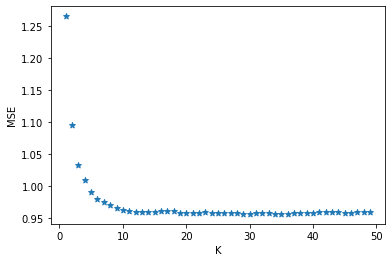

In [31]:
plt.scatter(X_axis, Y_axis, marker = '*')
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()

Mean Error

In [32]:
ct = 0
ln = 0
for i in y_pred:      # Mean Error
  ct += i
  ln += 1
ct/ln

array([6.96831075])

Mean_squared_error

In [33]:
mean_squared_error(y_test, y_pred, squared = False)   # RMSE

0.9899329375874727

Root_mean_squared_error

In [34]:
mean_squared_error(y_test, y_pred, squared = True)    # MSE

0.9799672209205631